#### IMPORT DATASET

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
customer = pd.read_csv("customer_shopping_data.csv")

In [ ]:
customer.head(5)

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


#### 1. Check Basic Info

In [ ]:
customer.info()   # Data types, Non-null Counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


In [ ]:
customer.shape

(99457, 10)

In [ ]:
customer.describe()    # Summary stats for numeric columns

,age,quantity,price
count,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,689.256321
std,14.990054,1.413025,941.184567
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


### Handle Missing Value

In [ ]:
customer.isnull().mean()*100

,0
invoice_no,0.0
customer_id,0.0
gender,0.0
age,0.0
category,0.0
quantity,0.0
price,0.0
payment_method,0.0
invoice_date,0.0
shopping_mall,0.0


In [ ]:
customer.isnull().any()

,0
invoice_no,False
customer_id,False
gender,False
age,False
category,False
quantity,False
price,False
payment_method,False
invoice_date,False
shopping_mall,False


In [ ]:
customer.isnull().sum()   #isnull() | is null a function that is return the nan values from data frame

,0
invoice_no,0
customer_id,0
gender,0
age,0
category,0
quantity,0
price,0
payment_method,0
invoice_date,0
shopping_mall,0


In [ ]:
customer.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
99452,False
99453,False
99454,False
99455,False


###  Handling Duplicated value

In [ ]:
customer.drop_duplicates()   # Drop_Duplicates function drop the dublecates data from data set

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


In [ ]:
customer[customer['payment_method'].isna()==1]

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall


In [ ]:
len(customer)

99457

In [ ]:
customer.fillna(0)

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


In [ ]:
customer.corr(numeric_only=True) # Corr Function that is give the relationship between Columns

,age,quantity,price
age,1.000000,0.000667,0.001694
quantity,0.000667,1.000000,0.344880
price,0.001694,0.344880,1.000000


In [ ]:
customer['price'].max()

5250.0

In [ ]:
customer[customer['price'].duplicated()==1]

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
5,I227836,C657758,Female,28,Clothing,5,1500.40,Credit Card,24/05/2022,Forum Istanbul
9,I326945,C283361,Female,60,Clothing,2,600.16,Credit Card,22/08/2021,Kanyon
13,I179802,C312861,Male,25,Clothing,2,600.16,Cash,17/11/2022,Cevahir AVM
14,I336189,C555402,Female,67,Clothing,2,600.16,Credit Card,3/6/2022,Kanyon
15,I688768,C362288,Male,24,Shoes,5,3000.85,Credit Card,7/11/2021,Viaport Outlet
...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


#### Rename Multiple Columns in a list

In [ ]:
customer = customer.rename(columns = {'invoice_no': 'invoice_no','customer_id':'Customer_id','gender':'Gender' ,'quantity': 'Quantity', 'price':'Price', 'age':'Age', 'payment_method':'Payment_method','invoice_date':'Invoice_date','shopping_mall':'Shopping_mall'})

In [ ]:
customer

,invoice_no,Customer_id,Gender,Age,category,Quantity,Price,Payment_method,Invoice_date,Shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


### Change Datatypes

In [ ]:
customer.columns

Index(['invoice_no', 'Customer_id', 'Gender', 'Age', 'category', 'Quantity',
       'Price', 'Payment_method', 'Invoice_date', 'Shopping_mall'],
      dtype='object')

In [ ]:
customer.dtypes

,0
invoice_no,object
Customer_id,object
Gender,object
Age,int64
category,object
Quantity,int64
Price,float64
Payment_method,object
Invoice_date,object
Shopping_mall,object


In [ ]:
customer['Invoice_date'] = pd.to_datetime(customer['Invoice_date'], errors='coerce', dayfirst=True)

In [ ]:
customer.dtypes

,0
invoice_no,object
Customer_id,object
Gender,object
Age,int64
category,object
Quantity,int64
Price,float64
Payment_method,object
Invoice_date,datetime64[ns]
Shopping_mall,object


#### Trim Whitespace in Text Columns

In [ ]:
str_cols = customer.select_dtypes(include='object').columns
customer[str_cols] = customer[str_cols].apply(lambda x: x.str.strip())

In [ ]:
customer

,invoice_no,Customer_id,Gender,Age,category,Quantity,Price,Payment_method,Invoice_date,Shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon
...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,2022-09-21,Kanyon
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,2021-09-22,Forum Istanbul
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,2021-03-28,Metrocity
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,2021-03-16,Istinye Park


### Filter Outliers

In [ ]:
customer = customer[customer['Price'] < 1000]

In [ ]:
customer

,invoice_no,Customer_id,Gender,Age,category,Quantity,Price,Payment_method,Invoice_date,Shopping_mall
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon
6,I121056,C151197,Female,49,Cosmetics,1,40.66,Cash,2022-03-13,Istinye Park
7,I293112,C176086,Female,32,Clothing,2,600.16,Credit Card,2021-01-13,Mall of Istanbul
8,I293455,C159642,Male,69,Clothing,3,900.24,Credit Card,2021-11-04,Metrocity
...,...,...,...,...,...,...,...,...,...,...
99451,I675411,C513603,Male,50,Toys,5,179.20,Cash,2021-10-09,Metropol AVM
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,2022-09-21,Kanyon
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,2021-09-22,Forum Istanbul
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,2021-03-28,Metrocity


### Create New Columns

In [ ]:
customer['Total_Price'] = (customer['Price'] * customer['Quantity']).round(2)

/tmp/ipython-input-31-1579121226.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer['Total_Price'] = (customer['Price'] * customer['Quantity']).round(2)


In [ ]:
customer['purchase_month'] = customer['Invoice_date'].dt.month

/tmp/ipython-input-32-2711718520.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer['purchase_month'] = customer['Invoice_date'].dt.month


In [ ]:
customer

,invoice_no,Customer_id,Gender,Age,category,Quantity,Price,Payment_method,Invoice_date,Shopping_mall,Total_Price,purchase_month
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,300.08,11
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,242.40,10
6,I121056,C151197,Female,49,Cosmetics,1,40.66,Cash,2022-03-13,Istinye Park,40.66,3
7,I293112,C176086,Female,32,Clothing,2,600.16,Credit Card,2021-01-13,Mall of Istanbul,1200.32,1
8,I293455,C159642,Male,69,Clothing,3,900.24,Credit Card,2021-11-04,Metrocity,2700.72,11
...,...,...,...,...,...,...,...,...,...,...,...,...
99451,I675411,C513603,Male,50,Toys,5,179.20,Cash,2021-10-09,Metropol AVM,896.00,10
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,2022-09-21,Kanyon,293.25,9
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,2021-09-22,Forum Istanbul,20.92,9
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,2021-03-28,Metrocity,20.92,3


#### Export the Clean Data

In [ ]:
customer.to_csv('customer_cleaned.csv', index=False)

In [ ]:
customer

,invoice_no,Customer_id,Gender,Age,category,Quantity,Price,Payment_method,Invoice_date,Shopping_mall,Total_Price,purchase_month
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,300.08,11
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,242.40,10
6,I121056,C151197,Female,49,Cosmetics,1,40.66,Cash,2022-03-13,Istinye Park,40.66,3
7,I293112,C176086,Female,32,Clothing,2,600.16,Credit Card,2021-01-13,Mall of Istanbul,1200.32,1
8,I293455,C159642,Male,69,Clothing,3,900.24,Credit Card,2021-11-04,Metrocity,2700.72,11
...,...,...,...,...,...,...,...,...,...,...,...,...
99451,I675411,C513603,Male,50,Toys,5,179.20,Cash,2021-10-09,Metropol AVM,896.00,10
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,2022-09-21,Kanyon,293.25,9
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,2021-09-22,Forum Istanbul,20.92,9
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,2021-03-28,Metrocity,20.92,3


### “Retail Sales Data Analysis and Visualization for Business Optimization”

### 1. Sales Trend per Month

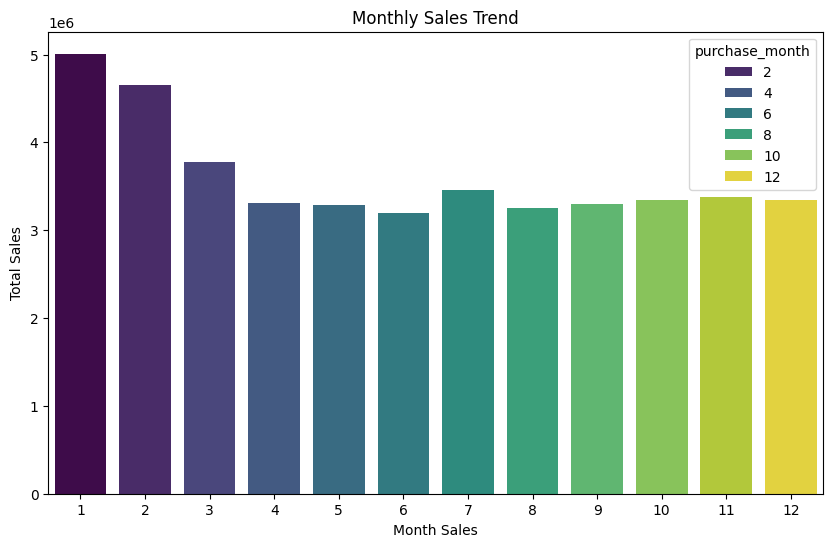

In [ ]:
monthly_sales = customer.groupby('purchase_month')['Total_Price'].sum().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=monthly_sales, x='purchase_month', y='Total_Price', palette='viridis', hue = 'purchase_month')
plt.title("Monthly Sales Trend")
plt.xlabel("Month Sales")
plt.ylabel("Total Sales")
plt.show()

### 2. Which product categories sold the most?

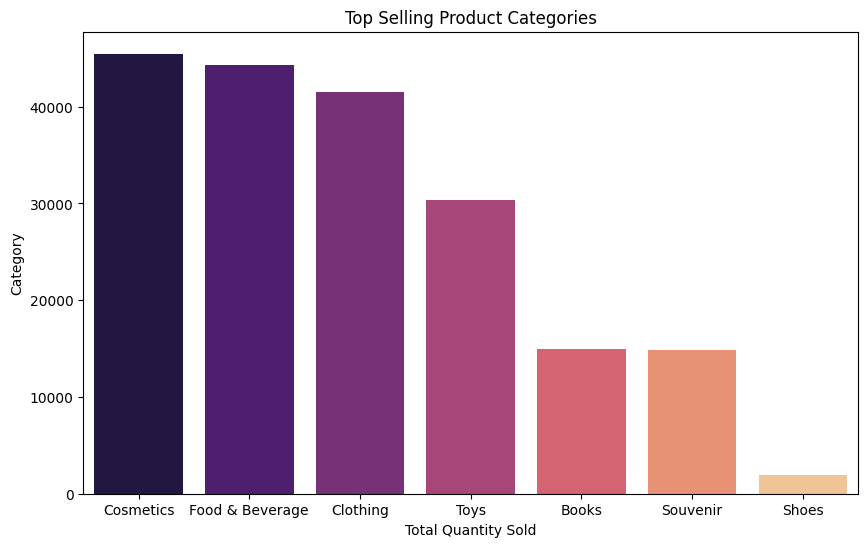

In [ ]:
category_sales = customer.groupby('category')['Quantity'].sum().reset_index().sort_values(by='Quantity', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=category_sales, x='category', y='Quantity', palette='magma', hue  = 'category')
plt.title("Top Selling Product Categories")
plt.xlabel("Total Quantity Sold")
plt.ylabel("Category")
plt.show()

### 3.Buying habits of customers according to their age

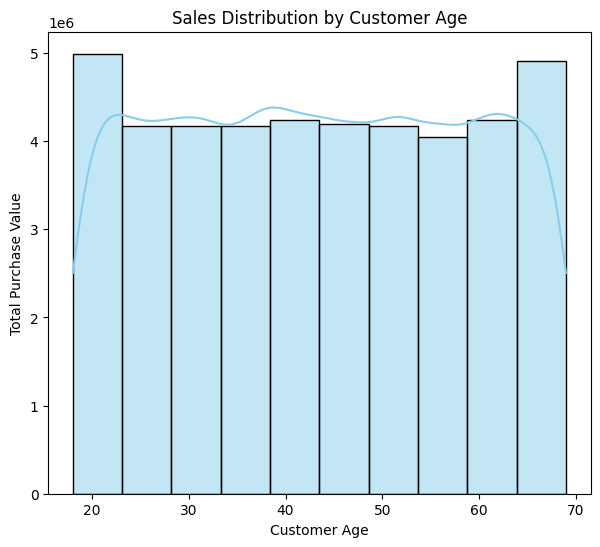

In [ ]:
plt.figure(figsize=(7,6))
sns.histplot(data=customer, x='Age', weights='Total_Price', bins=10, kde=True, color='skyblue')
plt.title("Sales Distribution by Customer Age")
plt.xlabel("Customer Age")
plt.ylabel("Total Purchase Value")
plt.show()

### 4.Which category is preferred according to gender(Male & Female)

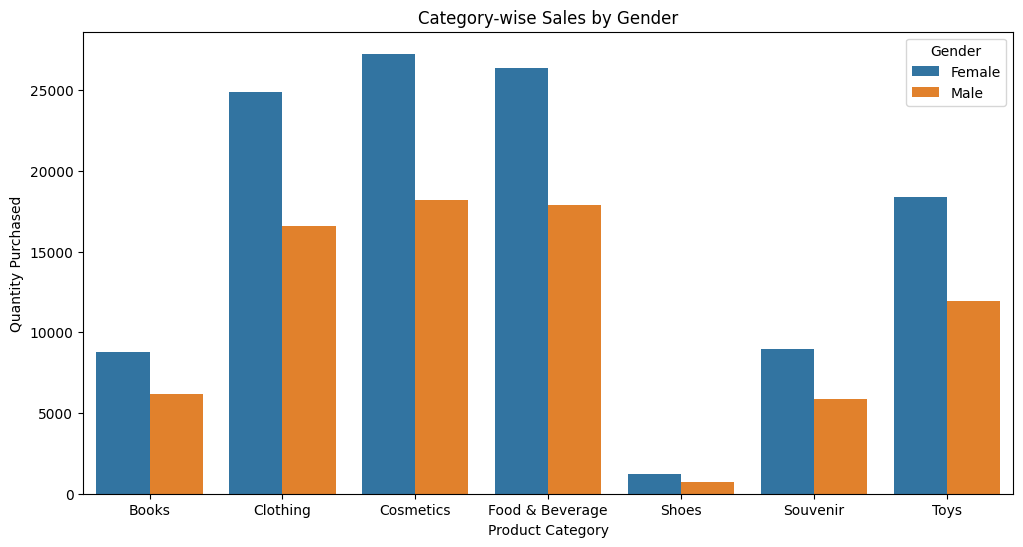

In [ ]:
gender_category = customer.groupby(['Gender', 'category'])['Quantity'].sum().reset_index()

plt.figure(figsize=(12,6))
sns.barplot(data=gender_category, x='category', y='Quantity', hue='Gender')
plt.title("Category-wise Sales by Gender")
plt.xlabel("Product Category")
plt.ylabel("Quantity Purchased")
plt.show()

#### 5. Which Payment Methods are used  for payment

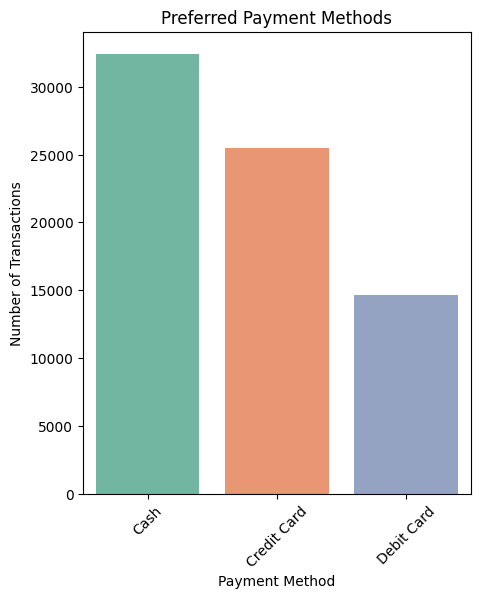

In [ ]:
payment_count = customer['Payment_method'].value_counts().reset_index()
payment_count.columns = ['Payment_method', 'Count']

plt.figure(figsize=(5,6))
sns.barplot(data=payment_count, x='Payment_method', y='Count', palette='Set2', hue='Payment_method')
plt.title("Preferred Payment Methods")
plt.xlabel("Payment Method")
plt.ylabel("Number of Transactions")
plt.xticks(rotation=45)
plt.show()

#### 6. Which shopping mall had the highest sales?

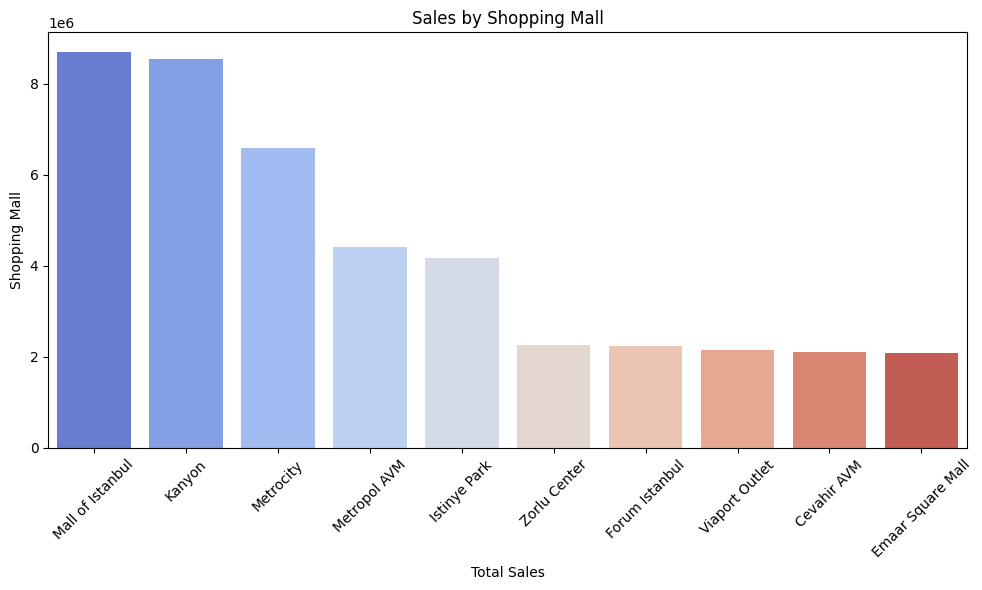

In [ ]:
mall_sales = customer.groupby('Shopping_mall')['Total_Price'].sum().reset_index().sort_values(by='Total_Price', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=mall_sales, x='Shopping_mall', y='Total_Price', palette='coolwarm',hue ='Shopping_mall')
plt.title("Sales by Shopping Mall")
plt.xlabel("Total Sales")
plt.ylabel("Shopping Mall")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 7.Total Sales According to Gender

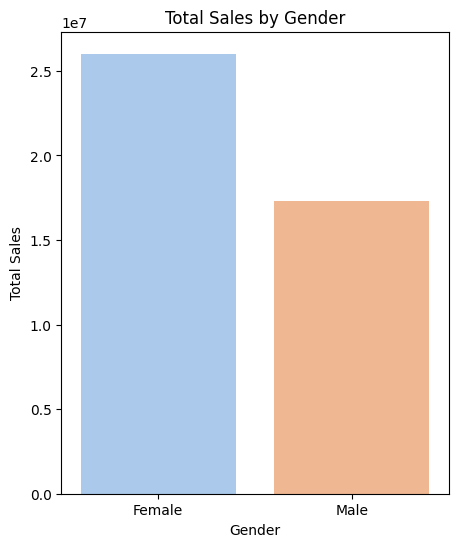

In [ ]:
gender_sales = customer.groupby('Gender')['Total_Price'].sum().reset_index()

plt.figure(figsize=(5,6))
sns.barplot(data=gender_sales, x='Gender', y='Total_Price', palette='pastel', hue='Gender')
plt.title("Total Sales by Gender")
plt.ylabel("Total Sales")
plt.show()

### 8. Age vs Total Purchase

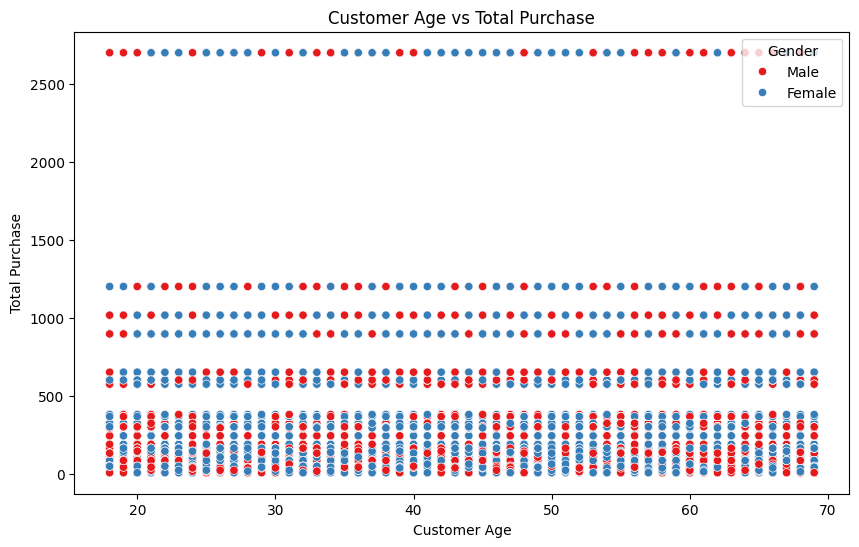

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=customer, x='Age', y='Total_Price', hue='Gender', palette='Set1')
plt.title("Customer Age vs Total Purchase")
plt.xlabel("Customer Age")
plt.ylabel("Total Purchase")
plt.show()

#### 9 Payment Method Share

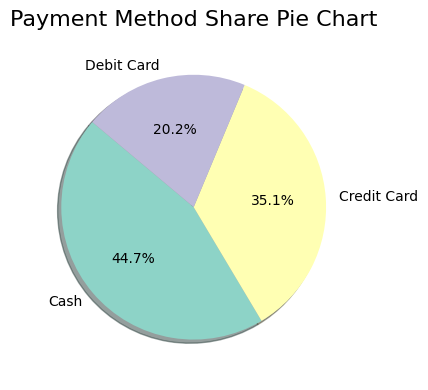

In [ ]:
payment_share = customer['Payment_method'].value_counts()

plt.figure(figsize=(4,4))
colors = sns.color_palette('Set3')
plt.pie(payment_share, labels=payment_share.index, colors=colors, autopct='%1.1f%%', startangle=140, shadow=True)
plt.title("Payment Method Share Pie Chart", fontsize=16)
plt.axis('equal')
plt.tight_layout()
plt.show()

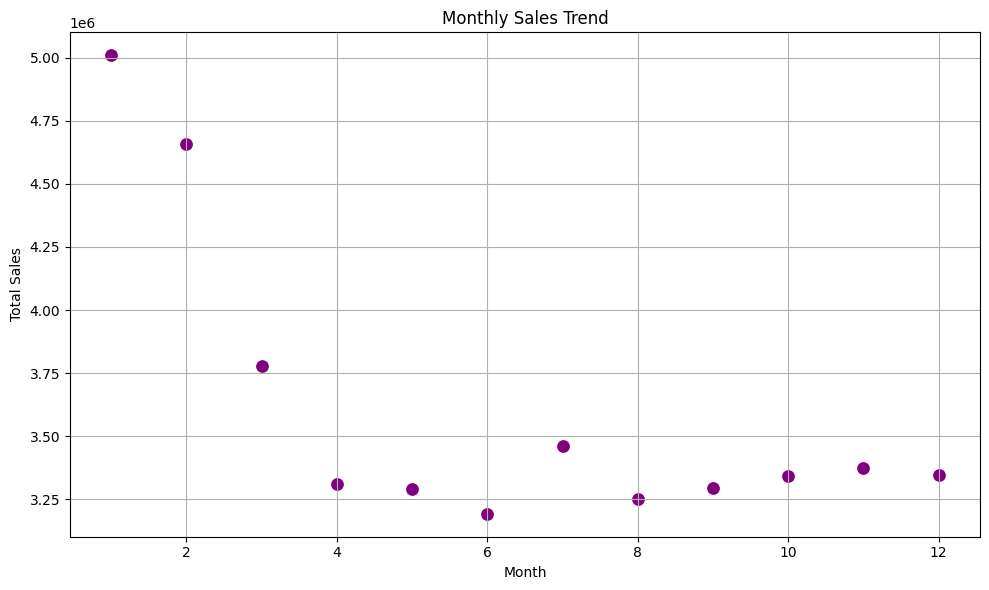

In [ ]:
monthly_sales = customer.groupby('purchase_month')['Total_Price'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.scatterplot(data=monthly_sales, x='purchase_month', y='Total_Price', s=100, color='purple')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.grid(True)
plt.tight_layout()
plt.show()

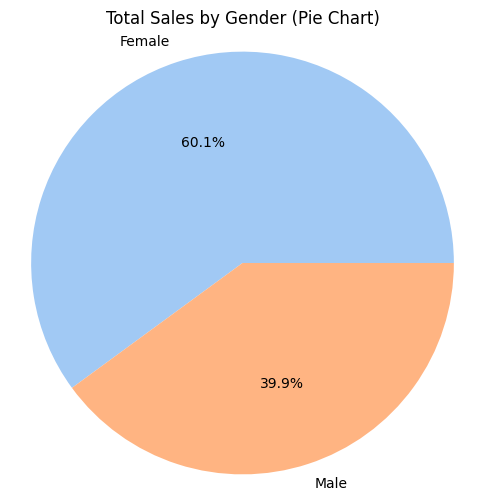

In [ ]:
gender_sales = customer.groupby('Gender')['Total_Price'].sum().reset_index()
plt.figure(figsize=(6,6))
plt.pie(gender_sales['Total_Price'], labels=gender_sales['Gender'], autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title("Total Sales by Gender (Pie Chart)")
plt.axis('equal')
plt.show()


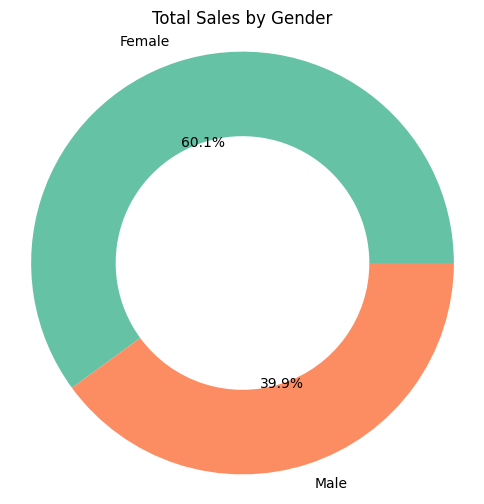

In [ ]:
gender_sales = customer.groupby('Gender')['Total_Price'].sum().reset_index()
plt.figure(figsize=(6,6))
plt.pie(gender_sales['Total_Price'], labels=gender_sales['Gender'], autopct='%1.1f%%',
        colors=sns.color_palette('Set2'), wedgeprops={'width': 0.4})
plt.title("Total Sales by Gender")
plt.axis('equal')
plt.show()


/tmp/ipython-input-79-1747270999.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Gender')


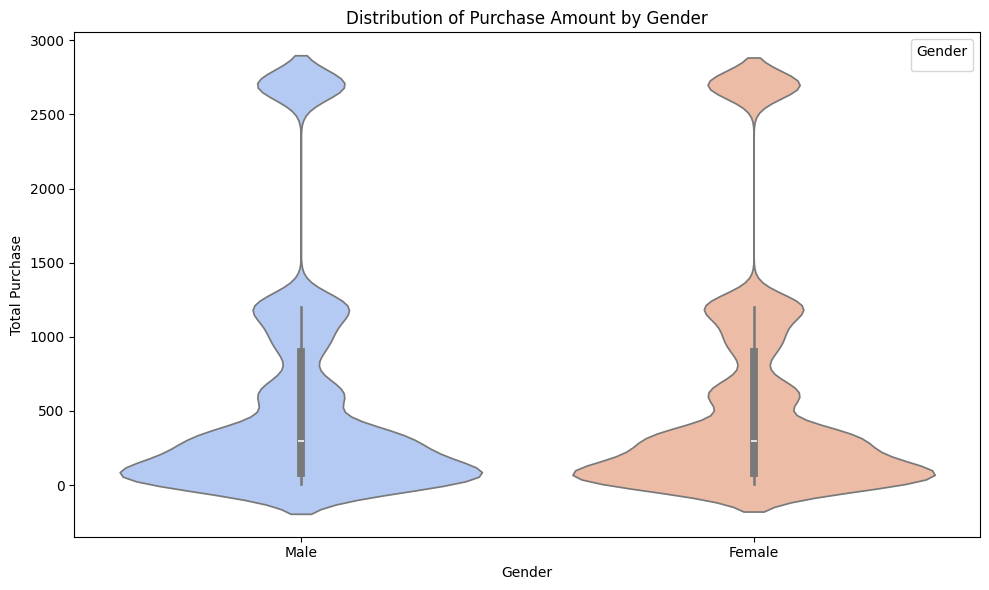

In [ ]:
plt.figure(figsize=(10,6))
sns.violinplot(data=customer, x='Gender', y='Total_Price', palette='coolwarm', hue = 'Gender')
plt.title("Distribution of Purchase Amount by Gender")
plt.xlabel("Gender")
plt.ylabel("Total Purchase")
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

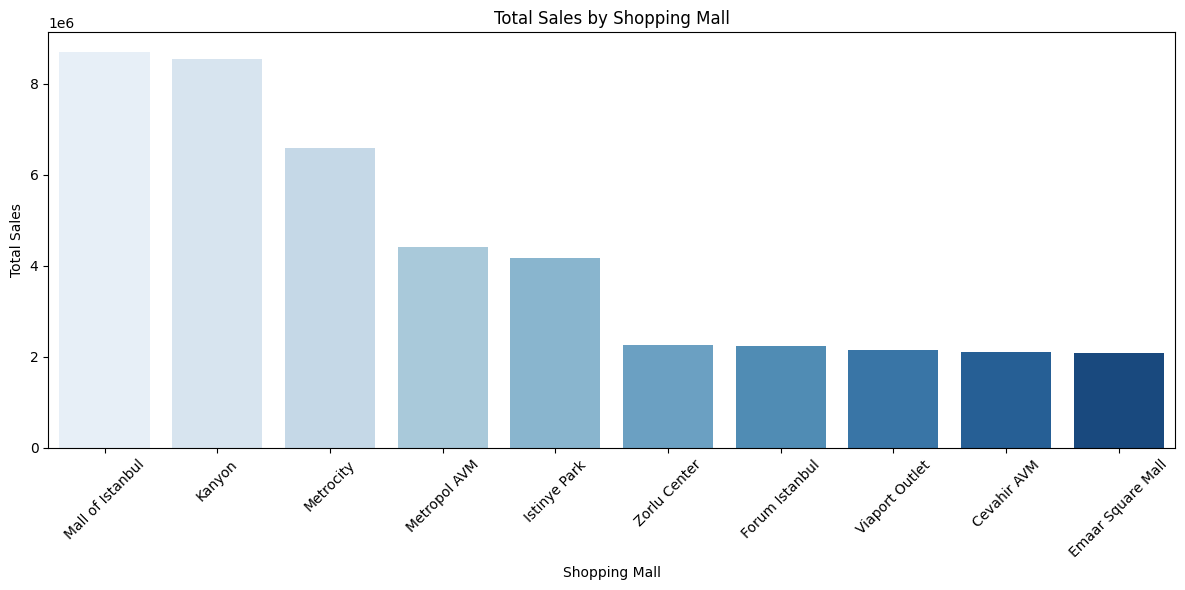

In [ ]:

mall_sales = customer.groupby('Shopping_mall')['Total_Price'].sum().reset_index()
mall_sales = mall_sales.sort_values(by='Total_Price', ascending=False)


plt.figure(figsize=(12,6))
sns.barplot(data=mall_sales, x='Shopping_mall', y='Total_Price', palette='Blues', hue  = 'Shopping_mall')
plt.title("Total Sales by Shopping Mall")
plt.xlabel("Shopping Mall")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


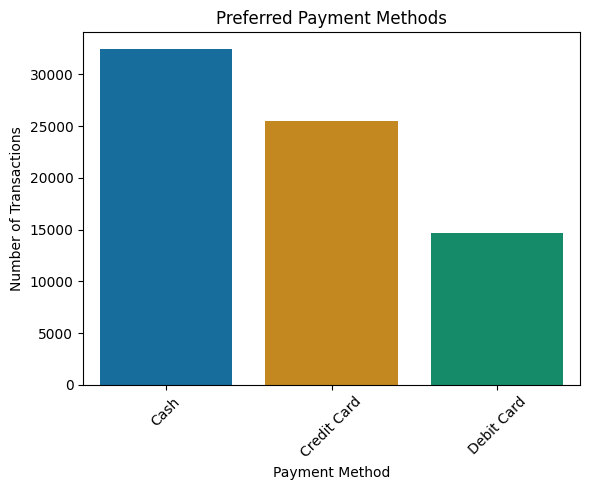

In [ ]:
payment_count = customer['Payment_method'].value_counts().reset_index()
payment_count.columns = ['Payment_method', 'Count']
plt.figure(figsize=(6,5))
sns.barplot(data=payment_count, x='Payment_method', y='Count', palette='colorblind', hue = 'Payment_method')
plt.title("Preferred Payment Methods")
plt.xlabel("Payment Method")
plt.ylabel("Number of Transactions")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


  Payment_method  Count
0           Cash  32427
1    Credit Card  25510
2     Debit Card  14645


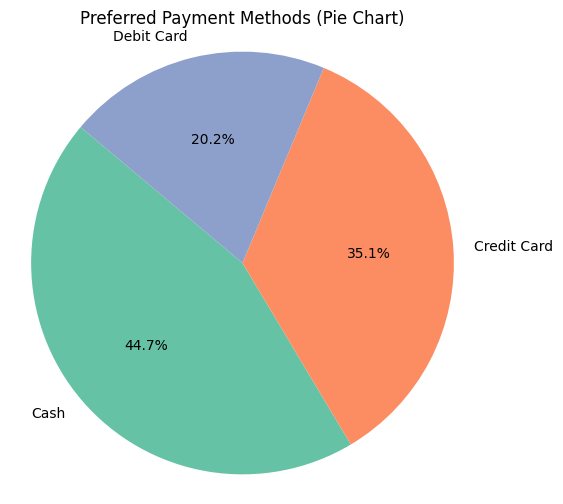

In [ ]:

payment_count = customer['Payment_method'].value_counts().reset_index()
payment_count.columns = ['Payment_method', 'Count']
print(payment_count.head())

plt.figure(figsize=(6,6))
plt.pie(payment_count['Count'],
        labels=payment_count['Payment_method'],
        autopct='%1.1f%%',
        colors=sns.color_palette('Set2'),
        startangle=140)
plt.title("Preferred Payment Methods (Pie Chart)")
plt.axis('equal')
plt.show()


### Report

The project involved analyzing sales, customer, and inventory data to identify monthly sales trends, customer behavior, and top-performing product categories. Using Python key insights were visualized to recommend improvements in stock management, product recommendations, and customer targeting for better business decision-making and profitability.